In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# simple linear regression
##### as we are using only one feature to predict target so this is SLR.


In [3]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


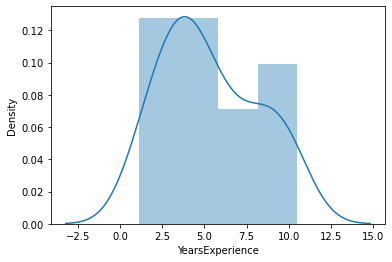

In [5]:
sns.distplot(df['YearsExperience'])
plt.show()
# distplot = give probability of data points and give distribution

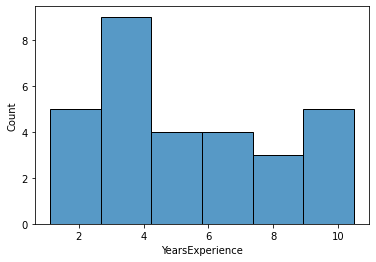

In [5]:
sns.histplot(df['YearsExperience'])
plt.show()

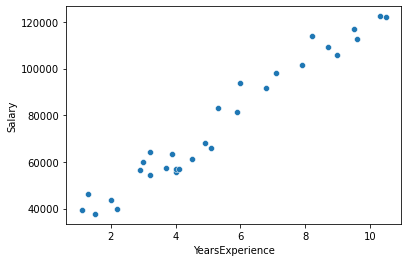

In [6]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

In [7]:
y = df.pop('Salary')
X = df

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=22)

In [10]:
X_train

,YearsExperience
15,4.9
9,3.7
2,1.5
7,3.2
16,5.1
10,3.9
29,10.5
13,4.1
14,4.5
18,5.9


In [11]:
X_test

,YearsExperience
26,9.5
24,8.7
27,9.6
1,1.3
23,8.2
19,6.0
3,2.0
5,2.9
17,5.3


In [12]:
y_train

15     67938.0
9      57189.0
2      37731.0
7      54445.0
16     66029.0
10     63218.0
29    121872.0
13     57081.0
14     61111.0
18     81363.0
25    105582.0
8      64445.0
20     91738.0
11     55794.0
22    101302.0
6      60150.0
28    122391.0
0      39343.0
12     56957.0
4      39891.0
21     98273.0
Name: Salary, dtype: float64

In [13]:
# instance of a model
# training a model
# using the trained model we will find predictions
# evaluate model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# instance of a model
lr = LinearRegression()

In [16]:
# training a model
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)

In [18]:
y_pred

array([113556.91996162, 106028.26766082, 114498.00149922,  36388.23387838,
       101322.85997281,  80619.0661456 ,  42975.80464159,  51445.53847999,
        74031.4953824 ])

In [19]:
y_test

26    116969.0
24    109431.0
27    112635.0
1      46205.0
23    113812.0
19     93940.0
3      43525.0
5      56642.0
17     83088.0
Name: Salary, dtype: float64

In [20]:
# evaluate model
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
score = r2_score(y_test,y_pred)

In [22]:
print(score)

0.922614996971864


In [23]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [24]:
print(rmse)

7928.9312041698895


In [25]:
# beta coefficient of YearsExperiance = beta1
lr.coef_

array([9410.815376])

In [26]:
# beta coefficient of constant = beta0
lr.intercept_

24154.173889577432

### Thus, equation of prediction is : 
### y_pred = 24154.17 + 9410.8153*YearsExperiance

In [27]:
pred = 24154.17 + 9410.8153*9.5
print(pred)

113556.91535


In [28]:
print(y_pred)

[113556.91996162 106028.26766082 114498.00149922  36388.23387838
 101322.85997281  80619.0661456   42975.80464159  51445.53847999
  74031.4953824 ]


## check assumption on linear regression

In [29]:
y_pred_train = lr.predict(X_train)

In [30]:
residual = y_train - y_pred_train

In [31]:
## 1. error terms are normally distributed

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


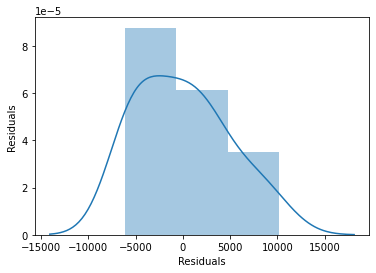

In [32]:
sns.distplot(residual)
plt.xlabel('Residuals')
plt.ylabel('Residuals')
plt.show()

In [35]:
## 2 and 4th assumption


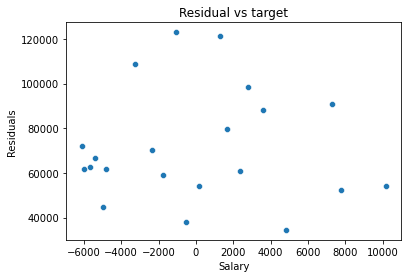

In [36]:
sns.scatterplot(x=residual,y=y_pred_train)
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residual vs target')
plt.show()

### - errors are independant to target and have constant variance

## overfit / underfit

In [37]:
# lr = LinearRegression
# lr.fit(X_train,y_train)

In [40]:
y_pred_train = lr.predict(X_train)

In [41]:
y_pred_test = lr.predict(X_test)

In [42]:
score_train =r2_score(y_train , y_pred_train) 
score_test = r2_score( y_test , y_pred_test)

In [43]:
print(score_train,score_test)

0.9638395948975294 0.922614996971864


## Saving the model

In [46]:
import pickle

In [47]:
## save the model

In [48]:
model_file = 'linear_salary_model.sav'

In [49]:
file = open(model_file,'wb')

In [50]:
pickle.dump(lr,file)

In [51]:
file.close()

In [52]:
## reload the model

In [53]:
file1 = open(model_file,'rb')

In [54]:
print(file1)

<_io.BufferedReader name='linear_salary_model.sav'>


## predicting unseen data

In [55]:
X_unseen = np.array([[1.2],[2.4]])

In [56]:
y_unseen = lr.predict(X_unseen)

# Multiple Linear Regression

### load dataset

In [10]:
df1 = pd.read_csv("50_Startups.csv")
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Encoding categorical data

In [11]:
df = pd.get_dummies(df1['State'],drop_first=True)
df

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [12]:
df = pd.concat([df,df1],axis=1)
df

,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,1,0,142107.34,91391.77,366168.42,Florida,166187.94
5,0,1,131876.90,99814.71,362861.36,New York,156991.12
6,0,0,134615.46,147198.87,127716.82,California,156122.51
7,1,0,130298.13,145530.06,323876.68,Florida,155752.60
8,0,1,120542.52,148718.95,311613.29,New York,152211.77
9,0,0,123334.88,108679.17,304981.62,California,149759.96


In [13]:
df = df.drop('State',axis=1)
df

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,0,134615.46,147198.87,127716.82,156122.51
7,1,0,130298.13,145530.06,323876.68,155752.60
8,0,1,120542.52,148718.95,311613.29,152211.77
9,0,0,123334.88,108679.17,304981.62,149759.96


## splitting data for train and test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = df.pop('Profit')
X = df

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=22)

In [17]:
X_train

,Florida,New York,R&D Spend,Administration,Marketing Spend
23,1,0,67532.53,105751.03,304768.73
11,0,0,100671.96,91790.61,249744.55
9,0,0,123334.88,108679.17,304981.62
10,1,0,101913.08,110594.11,229160.95
37,0,0,44069.95,51283.14,197029.42
21,0,1,78389.47,153773.43,299737.29
7,1,0,130298.13,145530.06,323876.68
28,1,0,66051.52,182645.56,118148.20
40,0,0,28754.33,118546.05,172795.67
19,0,1,86419.70,153514.11,0.00


In [18]:
X_test

,Florida,New York,R&D Spend,Administration,Marketing Spend
32,0,0,63408.86,129219.61,46085.25
12,1,0,93863.75,127320.38,249839.44
25,0,0,64664.71,139553.16,137962.62
47,0,0,0.00,135426.92,0.00
33,1,0,55493.95,103057.49,214634.81
22,1,0,73994.56,122782.75,303319.26
3,0,1,144372.41,118671.85,383199.62
30,1,0,61994.48,115641.28,91131.24
26,1,0,75328.87,144135.98,134050.07
1,0,0,162597.70,151377.59,443898.53


In [19]:
y_train

23    108733.99
11    144259.40
9     149759.96
10    146121.95
37     89949.14
21    111313.02
7     155752.60
28    103282.38
40     78239.91
19    122776.86
6     156122.51
17    125370.37
45     64926.08
2     191050.39
48     35673.41
27    105008.31
15    129917.04
5     156991.12
42     71498.49
34     96712.80
39     81005.76
24    108552.04
14    132602.65
18    124266.90
29    101004.64
46     49490.75
31     97483.56
8     152211.77
20    118474.03
43     69758.98
38     81229.06
36     90708.19
0     192261.83
44     65200.33
4     166187.94
Name: Profit, dtype: float64

In [20]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

In [21]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

## scaling on dataset

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
X_test_scaled = scaler.transform(X_test)

In [26]:
y_train_scaled = scaler.fit_transform(y_train)

In [27]:
y_test_scaled = scaler.transform(y_test)

## training multiple linear model on training set

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr1 = LinearRegression()

In [30]:
lr1.fit(X_train_scaled,y_train_scaled)

LinearRegression()

## predicting test set results

In [32]:
y_pred = lr1.predict(X_test_scaled)

In [33]:
y_pred

array([[-0.29561836],
       [ 0.41091001],
       [-0.23864065],
       [-1.61478537],
       [-0.37769241],
       [ 0.02696207],
       [ 1.43883493],
       [-0.29842261],
       [-0.02133867],
       [ 1.88087816],
       [-0.62958701],
       [-0.95426787],
       [ 0.09205156],
       [-1.58891555],
       [ 0.36753682]])

In [34]:
lr1.coef_

array([[ 0.00113328, -0.02956714,  0.94833836, -0.01373755,  0.04693498]])

In [35]:
lr1.intercept_

array([1.39034493e-16])

In [36]:
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
score = r2_score(y_test_scaled,y_pred)

In [38]:
score

0.9202807384603291

In [39]:
rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))

In [40]:
rmse

0.3287855768023552

# assumptions

In [41]:
y_pred_train = lr1.predict(X_train_scaled)

In [42]:
residual = y_train_scaled - y_pred_train

<AxesSubplot:ylabel='Density'>

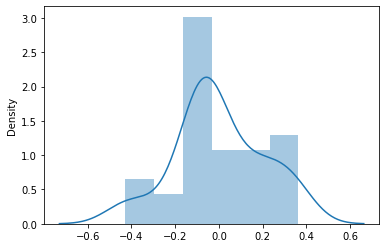

In [43]:
sns.distplot(residual)

In [44]:
y_pred_train

array([[-0.09719112],
       [ 0.56363166],
       [ 1.04172268],
       [ 0.57512476],
       [-0.59789239],
       [ 0.0394689 ],
       [ 1.17774566],
       [-0.23470474],
       [-0.95098872],
       [ 0.08698227],
       [ 1.18630461],
       [ 0.36975676],
       [-1.64827585],
       [ 1.70427599],
       [-1.62608281],
       [-0.05673045],
       [ 0.77845951],
       [ 1.18344373],
       [-1.05539708],
       [-0.59176492],
       [-0.73349823],
       [-0.0259066 ],
       [ 0.93449198],
       [ 0.39107891],
       [-0.29717545],
       [-1.4605771 ],
       [-0.3959279 ],
       [ 0.90951594],
       [ 0.07287808],
       [-1.33956166],
       [-1.15694938],
       [-0.94307086],
       [ 1.89482347],
       [-1.15824509],
       [ 1.46023542]])

### error terms are normally distributed¶

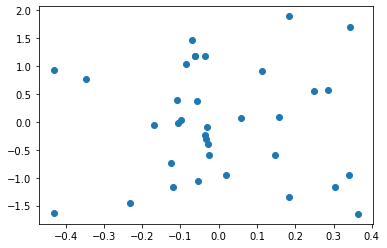

In [45]:
plt.scatter(residual,y_pred_train)
plt.show()

### Errors are independant and have constant variance

# Overfit / Underfit

In [46]:
y_pred_train = lr1.predict(X_train_scaled)

In [47]:
y_pred_test = lr1.predict(X_test_scaled)

In [48]:
score_train =r2_score(y_train_scaled , y_pred_train) 
score_test = r2_score( y_test_scaled , y_pred_test)

In [49]:
print(score_train,score_test)

0.9600543528526827 0.9202807384603291


## saving the model

In [51]:
import pickle

## save the model

model_file = 'Multi_profit_model.sav'

file = open(model_file,'wb')

pickle.dump(lr1,file)

file.close()

## reload the model

file1 = open(model_file,'rb')

print(file1)

<_io.BufferedReader name='Multi_profit_model.sav'>
